<a href="https://colab.research.google.com/github/Garik-ctrl/Z4088/blob/master/2025-04-10_Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [46]:
import numpy as np
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze()**2 + 3 * X.squeeze() + 5 + np.random.normal(0, 10, 100)

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

In [49]:
X2=pd.DataFrame(X_poly)
X2

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.10101,0.010203,0.001031,0.000104,0.000011,0.000001,1.072886e-07,1.083723e-08,1.094670e-09,1.105727e-10
2,1.0,0.20202,0.040812,0.008245,0.001666,0.000336,0.000068,1.373294e-05,2.774332e-06,5.604711e-07,1.132265e-07
3,1.0,0.30303,0.091827,0.027826,0.008432,0.002555,0.000774,2.346402e-04,7.110309e-05,2.154639e-05,6.529209e-06
4,1.0,0.40404,0.163249,0.065959,0.026650,0.010768,0.004351,1.757817e-03,7.102290e-04,2.869612e-04,1.159439e-04
...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,9.59596,92.082441,883.619379,8479.175861,81365.828968,780783.207264,7.492364e+06,7.189642e+07,6.899152e+08,6.620398e+09
96,1.0,9.69697,94.031221,911.817904,8841.870580,85739.351078,831411.889241,8.062176e+06,7.817868e+07,7.580962e+08,7.351236e+09
97,1.0,9.79798,96.000408,940.610059,9216.078360,90298.949583,884747.283795,8.668736e+06,8.493610e+07,8.322022e+08,8.153900e+09
98,1.0,9.89899,97.990001,970.002030,9602.040300,95050.499939,940903.938790,9.313999e+06,9.219918e+07,9.126787e+08,9.034598e+09


In [30]:
X_poly[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
models = {
    "Lineární regrese": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=100),
    "Lasso (L1)": Lasso(alpha=0.1, max_iter=10000)
}

In [52]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_R2 = model.score(X_train, y_train)
    test_R2 = model.score(X_test, y_test)

    print(f"{name}")
    print(f"   Trénovací MSE:  {train_mse:.2f}")
    print(f"   Testovací MSE:  {test_mse:.2f}")
    print(f"   Trénovací R2:   {train_R2:.4f}")
    print(f"   Testovací R2:   {test_R2:.4f}")
    print("-" * 40)

Lineární regrese
   Trénovací MSE:  74.93
   Testovací MSE:  81.73
   Trénovací R2:   0.9851
   Testovací R2:   0.9800
----------------------------------------
Ridge (L2)
   Trénovací MSE:  80.74
   Testovací MSE:  65.35
   Trénovací R2:   0.9840
   Testovací R2:   0.9840
----------------------------------------
Lasso (L1)
   Trénovací MSE:  80.69
   Testovací MSE:  60.23
   Trénovací R2:   0.9840
   Testovací R2:   0.9853
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.51481e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.295e+03, tolerance: 4.031e+01
  model = cd_fast.enet_coordinate_descent(


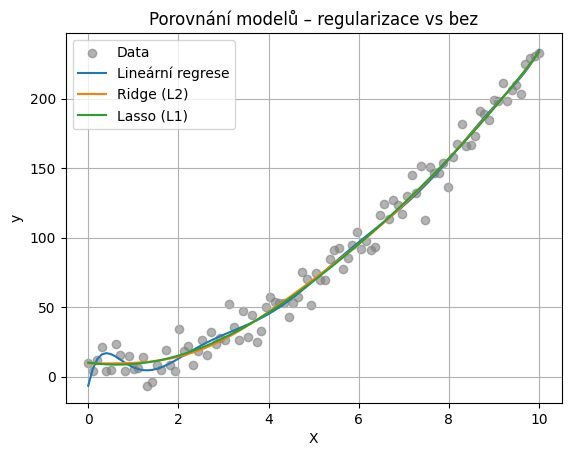

In [53]:
import matplotlib.pyplot as plt
X_sorted = np.sort(X.squeeze()).reshape(-1, 1)
X_sorted_poly = poly.transform(X_sorted)

plt.scatter(X, y, label="Data", color='gray', alpha=0.6)

for name, model in models.items():
    y_pred_plot = model.predict(X_sorted_poly)
    plt.plot(X_sorted, y_pred_plot, label=name)

plt.title("Porovnání modelů – regularizace vs bez")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
